# 

In [12]:
!pip install ultralytics opencv-python pillow


In [3]:
!yt-dlp https://www.youtube.com/watch?v=MNn9qKG2UFI -o traffic.mp4


[youtube] Extracting URL: https://www.youtube.com/watch?v=MNn9qKG2UFI
[youtube] MNn9qKG2UFI: Downloading webpage
[youtube] MNn9qKG2UFI: Downloading android sdkless player API JSON
[youtube] MNn9qKG2UFI: Downloading web safari player API JSON
[youtube] MNn9qKG2UFI: Downloading m3u8 information
[info] MNn9qKG2UFI: Downloading 1 format(s): 96
[download] Sleeping 6.00 seconds as required by the site...
[hlsnative] Downloading m3u8 manifest
[hlsnative] Total fragments: 59
[download] Destination: traffic.mp4

[download] 100.0% of ~   1.00KiB at    1.11KiB/s ETA Unknown (frag 0/59)
[download]   5.1% of ~  59.00KiB at    1.11KiB/s ETA Unknown (frag 0/59)
[download]   4.0% of ~ 177.00KiB at    1.11KiB/s ETA Unknown (frag 0/59)
[download]   3.6% of ~ 413.00KiB at    1.11KiB/s ETA Unknown (frag 0/59)
[download]   3.5% of ~ 885.00KiB at    1.11KiB/s ETA Unknown (frag 0/59)
[download]   3.4% of ~   1.79MiB at    1.11KiB/s ETA Unknown (frag 0/59)
[download]   3.4% of ~   3.63MiB at  116.48KiB/s ETA 

In [13]:
import cv2
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image


In [14]:
# Load pretrained YOLOv8 model
yolo = YOLO("yolov8n.pt")  # nano = fast on CPU


In [15]:
video_path = "traffic.mp4"   # <-- put your video file name here
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")


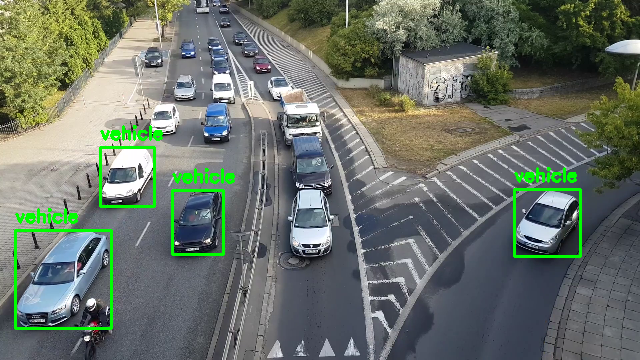

KeyboardInterrupt: 

In [17]:
frame_id = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_id += 1

    # ---- CPU OPTIMIZATION ----
    if frame_id % 5 != 0:   # process every 5th frame
        continue

    frame = cv2.resize(frame, (640, 360))

    # ---- YOLO DETECTION ----
    results = yolo(frame)[0]

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])

        # ---- CONFIDENCE FILTER ----
        if conf < 0.5:
            continue

        # ---- VEHICLE CLASSES ONLY ----
        if cls_id not in [2, 3, 5, 7]:  # car, motorcycle, bus, truck
            continue

        # ---- SIZE FILTER (remove drains / road objects) ----
        box_area = (x2 - x1) * (y2 - y1)
        frame_area = frame.shape[0] * frame.shape[1]

        if box_area < 0.01 * frame_area:
            continue

        # ---- DRAW BOUNDING BOX ----
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # ---- MERGED LABEL FOR CLEAN OUTPUT ----
        label = "vehicle"
        cv2.putText(
            frame, label,
            (x1, y1 - 8),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2
        )

    # ---- DISPLAY IN JUPYTER ----
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(rgb)

    clear_output(wait=True)
    display(img)

cap.release()
